<font color="red">IMPORTANT</font>

<font color="red">This is just a template for your project reports. You do not have to use the exact structure here. You may add your own sections/subsections. However, you are required to preserve the same report flow.</font>

# [Covid - Vaccination, Mobility and Census Data - Group 30]

Group Members:

- Emir Yiğit Akpınar
- Kayra Berk Akşit
- Ebrar Berenay Yiğit
- Eren Güngör
- Osman Cırık

## Introduction

<font color="orange">
Briefly discuss the background and the rationale of the project.
During the pandemic years, COVID-19 has thought us a lot. Mistakes are made by many institutions in terms of some key factors such as production dynamics, logistics etc. One of the important reasons is that we had no/little data about such a worldwide crisis; therefore, analyzing it required some time, in which humanity was vulnerable to mistakes. Thus, this project aims to analyze some COVID-19 dynamics such as vaccination and transportation in order to prevent further frustration by statistically forecasting a possible future pandemic or epidemic.
</font>

### Problem Definition

<font color="orange">
Our team will work on analyzing already existing COVID-19 data according to age groups and specific location distributions. We aim to create a machine learning algorithm to predict the percentage of people who will get their booster vaccination dose, using the amount of people who already get their first dose of vaccine. This analysis will help manufacturers and distributors to decide on how much of a production should be made and how they should distribute it proportionately if a new pandemic or any global crisis occurs hereinafter.
</font>

### Utilized Datasets

<font color="orange">
We used "COVID-19 Vaccinations in the United States,County" data set from Centers for Disease Control and Prevention organizaiton. Dataset can be reached from the link:
<font color="cyan">
 https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh/data
 </font>
 <font color="orange">
This data contains total 1,893,838 entiries with 80 features. We chose 10 features for our prediction model, Percentages of people who took 1 dose of vaccine divided by different age groups and people who completed their primary doses again divided by age groups. This fetures will be used to predict percentage of people who will demand booster vaccination dose.

</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("./drive")

fname = "COVID-19_Vaccinations_in_the_United_States_County.csv"
path_prefix = '/content/drive/MyDrive/CS210'
df = pd.read_csv(join(path_prefix, fname))

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Extracted the data. Just selected useful ones for our aim.
data = df[["Completeness_pct", "Administered_Dose1_Pop_Pct", "Administered_Dose1_Recip_5PlusPop_Pct", "Administered_Dose1_Recip_12PlusPop_Pct", "Administered_Dose1_Recip_18PlusPop_Pct", "Administered_Dose1_Recip_65PlusPop_Pct",
           "Series_Complete_Pop_Pct", "Series_Complete_5PlusPop_Pct", "Series_Complete_12PlusPop_Pct", "Series_Complete_18PlusPop_Pct", "Series_Complete_65PlusPop_Pct",
           "Booster_Doses_Vax_Pct", "Booster_Doses_5Plus_Vax_Pct", "Booster_Doses_12Plus_Vax_Pct", "Booster_Doses_18Plus_Vax_Pct", "Booster_Doses_65Plus_Vax_Pct",
           "Census2019", "Census2019_5PlusPop", "Census2019_12PlusPop", "Census2019_18PlusPop", "Census2019_65PlusPop"]]
data = data.dropna()

In [ ]:
data.head()

,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_5PlusPop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,...,Booster_Doses_Vax_Pct,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,97.0,81.5,85.4,89.5,91.0,95.0,68.8,72.2,75.9,77.3,...,58.9,58.9,59.7,60.8,70.2,10791.0,10275.0,9624.0,9090.0,4039.0
1,92.7,50.2,53.0,57.4,60.7,76.7,44.5,47.1,51.2,54.2,...,52.8,52.9,53.3,54.1,67.0,3834.0,3614.0,3303.0,3047.0,1101.0
2,93.8,78.5,84.1,91.2,92.6,95.0,67.8,72.7,79.1,80.6,...,43.2,43.2,44.3,46.6,68.3,28762.0,26833.0,23993.0,21606.0,4861.0
3,98.1,75.9,80.1,84.0,85.5,95.0,69.8,73.8,77.5,78.8,...,55.1,55.3,57.4,59.7,81.7,690743.0,650916.0,586456.0,521916.0,93591.0
4,93.9,53.7,56.9,61.9,64.8,73.0,49.9,52.9,57.6,60.2,...,43.4,43.5,44.9,47.4,67.3,4823.0,4538.0,4014.0,3556.0,972.0


## Data Exploration

<font color="white">
Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.

This section corresponds to the work you have done in the progress report.
</font>

In [ ]:
#Removed locations with population smaller than 20000 (Those locations are named as "kasaba" in Turkish, which are really small and less developed)
data = data[data["Census2019"] > 20000]
data = data.reset_index(drop=True)
data

,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_5PlusPop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,...,Booster_Doses_Vax_Pct,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,93.8,78.5,84.1,91.2,92.6,95.0,67.8,72.7,79.1,80.6,...,43.2,43.2,44.3,46.6,68.3,28762.0,26833.0,23993.0,21606.0,4861.0
1,98.1,75.9,80.1,84.0,85.5,95.0,69.8,73.8,77.5,78.8,...,55.1,55.3,57.4,59.7,81.7,690743.0,650916.0,586456.0,521916.0,93591.0
2,98.6,55.0,57.9,61.8,64.2,95.0,45.9,48.4,51.7,53.5,...,42.5,42.6,43.2,44.8,63.8,33739.0,31980.0,29314.0,26751.0,5366.0
3,98.6,67.5,70.9,73.8,74.5,95.0,58.6,61.7,64.4,64.8,...,49.3,49.5,50.7,52.1,74.3,293582.0,278331.0,257275.0,238914.0,40786.0
4,96.8,71.6,74.9,77.8,78.7,95.0,64.7,67.8,70.4,71.2,...,58.4,58.6,60.4,62.0,80.5,70772.0,67296.0,62107.0,57314.0,12262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,96.8,50.3,52.8,55.5,57.3,93.1,44.6,46.9,49.3,50.9,...,52.0,52.0,54.0,55.8,74.2,42754.0,40661.0,37218.0,33941.0,6523.0
40757,98.9,74.5,81.2,88.8,91.4,95.0,61.2,66.7,73.3,75.5,...,34.3,34.3,35.3,37.2,62.5,362924.0,333037.0,293809.0,262932.0,40534.0
40758,97.8,64.7,68.6,72.7,74.0,89.5,57.1,60.6,64.4,65.8,...,49.3,49.3,50.6,52.4,74.4,367804.0,346573.0,316996.0,291847.0,65976.0
40759,97.6,81.2,86.2,90.2,91.0,95.0,73.9,78.5,82.1,82.7,...,60.0,60.0,62.6,65.2,83.6,155299.0,146118.0,133217.0,121786.0,26943.0


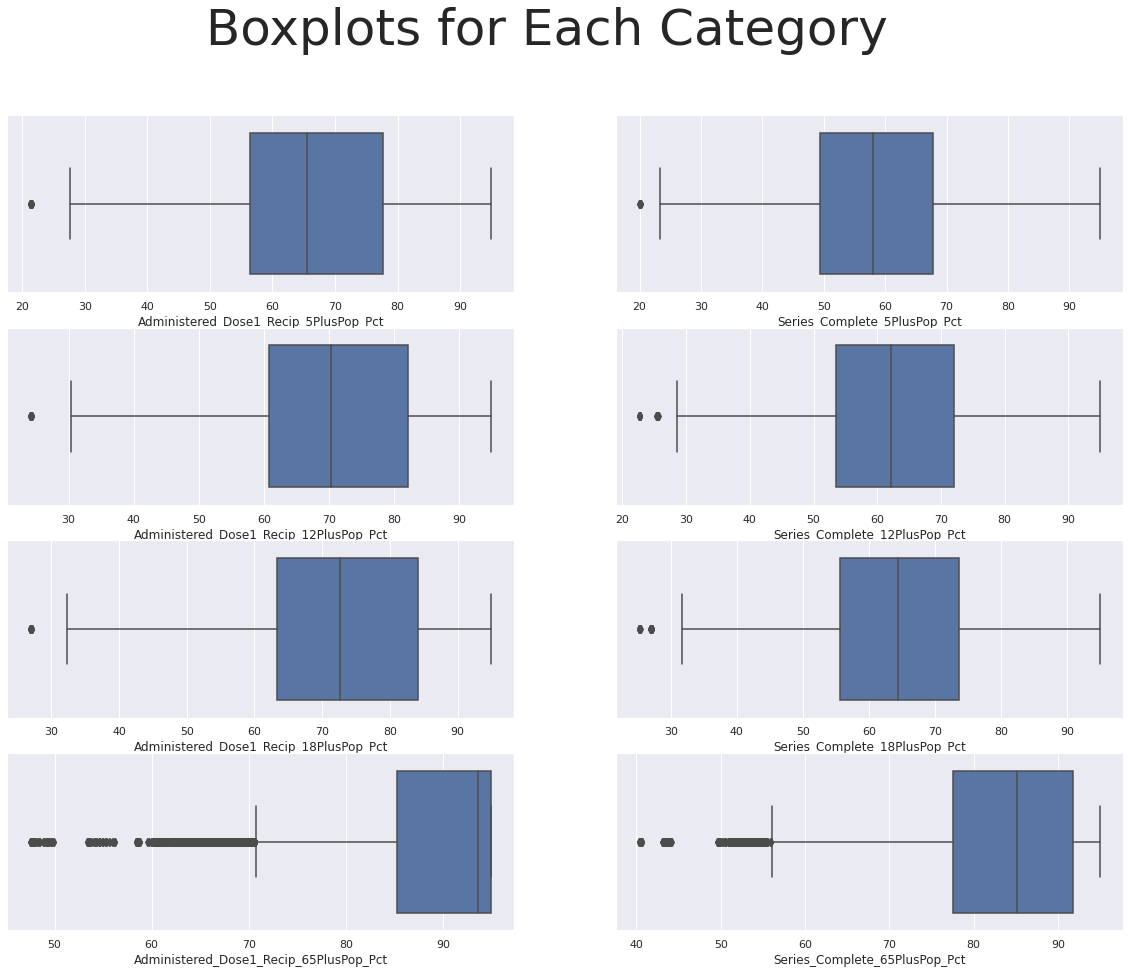

In [ ]:
#Control for outliers, so that we could further clean the data
fig, axes = plt.subplots(4, 2, figsize=(20, 15))
sns.set(font_scale=1)

fig.suptitle('Boxplots for Each Category', fontsize = 50)

sns.boxplot(ax=axes[0, 0], data=data, x='Administered_Dose1_Recip_5PlusPop_Pct')
sns.boxplot(ax=axes[1, 0], data=data, x='Administered_Dose1_Recip_12PlusPop_Pct')
sns.boxplot(ax=axes[2, 0], data=data, x='Administered_Dose1_Recip_18PlusPop_Pct')
sns.boxplot(ax=axes[3, 0], data=data, x='Administered_Dose1_Recip_65PlusPop_Pct')
sns.boxplot(ax=axes[0, 1], data=data, x='Series_Complete_5PlusPop_Pct')
sns.boxplot(ax=axes[1, 1], data=data, x='Series_Complete_12PlusPop_Pct')
sns.boxplot(ax=axes[2, 1], data=data, x='Series_Complete_18PlusPop_Pct')
sns.boxplot(ax=axes[3, 1], data=data, x='Series_Complete_65PlusPop_Pct')

In [ ]:
#Remove outliers
Q1 = data['Series_Complete_Pop_Pct'].quantile(0.25)
Q3 = data['Series_Complete_Pop_Pct'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (data['Series_Complete_Pop_Pct'] >= Q1 - 1.5 * IQR) & (data['Series_Complete_Pop_Pct'] <= Q3 + 1.5 *IQR)
clean_data = data.loc[filter]  
clean_data

,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_5PlusPop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,...,Booster_Doses_Vax_Pct,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
0,93.8,78.5,84.1,91.2,92.6,95.0,67.8,72.7,79.1,80.6,...,43.2,43.2,44.3,46.6,68.3,28762.0,26833.0,23993.0,21606.0,4861.0
1,98.1,75.9,80.1,84.0,85.5,95.0,69.8,73.8,77.5,78.8,...,55.1,55.3,57.4,59.7,81.7,690743.0,650916.0,586456.0,521916.0,93591.0
2,98.6,55.0,57.9,61.8,64.2,95.0,45.9,48.4,51.7,53.5,...,42.5,42.6,43.2,44.8,63.8,33739.0,31980.0,29314.0,26751.0,5366.0
3,98.6,67.5,70.9,73.8,74.5,95.0,58.6,61.7,64.4,64.8,...,49.3,49.5,50.7,52.1,74.3,293582.0,278331.0,257275.0,238914.0,40786.0
4,96.8,71.6,74.9,77.8,78.7,95.0,64.7,67.8,70.4,71.2,...,58.4,58.6,60.4,62.0,80.5,70772.0,67296.0,62107.0,57314.0,12262.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40756,96.8,50.3,52.8,55.5,57.3,93.1,44.6,46.9,49.3,50.9,...,52.0,52.0,54.0,55.8,74.2,42754.0,40661.0,37218.0,33941.0,6523.0
40757,98.9,74.5,81.2,88.8,91.4,95.0,61.2,66.7,73.3,75.5,...,34.3,34.3,35.3,37.2,62.5,362924.0,333037.0,293809.0,262932.0,40534.0
40758,97.8,64.7,68.6,72.7,74.0,89.5,57.1,60.6,64.4,65.8,...,49.3,49.3,50.6,52.4,74.4,367804.0,346573.0,316996.0,291847.0,65976.0
40759,97.6,81.2,86.2,90.2,91.0,95.0,73.9,78.5,82.1,82.7,...,60.0,60.0,62.6,65.2,83.6,155299.0,146118.0,133217.0,121786.0,26943.0


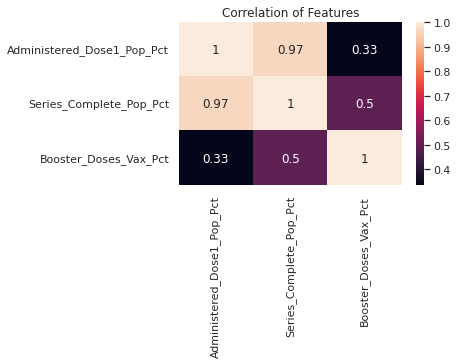

In [ ]:
#Correlation of three base variables
heatmap_df = clean_data[["Administered_Dose1_Pop_Pct", "Series_Complete_Pop_Pct", "Booster_Doses_Vax_Pct"]]
plt.figure(figsize=(5, 3))
dataplot = sns.heatmap(heatmap_df.corr(), annot=True)
dataplot.set_title('Correlation of Features')

plt.show()

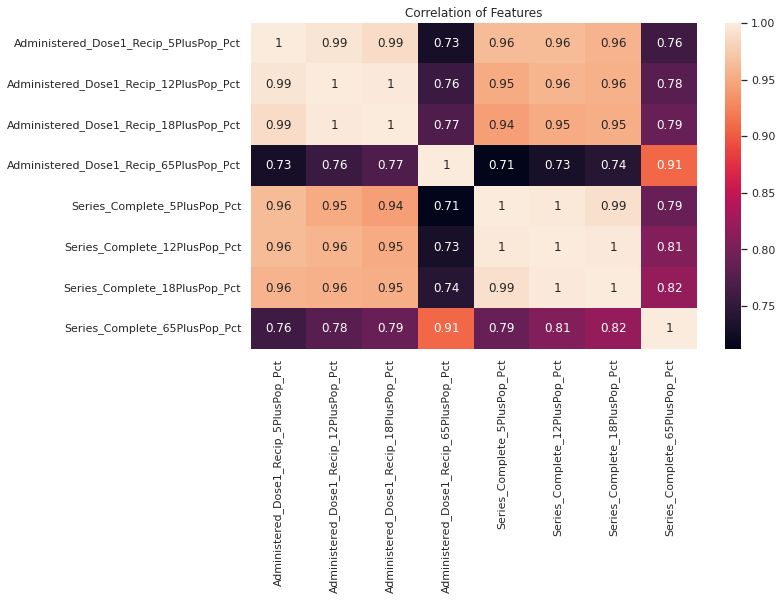

In [ ]:
#Correlation between Series Complete Percentage and Administered Dose Percentage by age
heatmap_df = clean_data[["Administered_Dose1_Recip_5PlusPop_Pct", "Administered_Dose1_Recip_12PlusPop_Pct", "Administered_Dose1_Recip_18PlusPop_Pct", "Administered_Dose1_Recip_65PlusPop_Pct",
                   "Series_Complete_5PlusPop_Pct", "Series_Complete_12PlusPop_Pct", "Series_Complete_18PlusPop_Pct", "Series_Complete_65PlusPop_Pct"]]
plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(heatmap_df.corr(), annot=True)
dataplot.set_title('Correlation of Features')

plt.show()

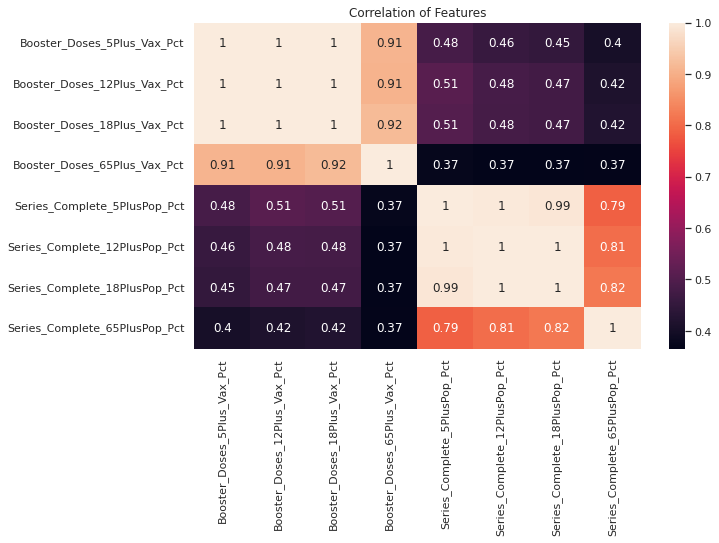

In [ ]:
#Correlation between Booster Dose Percentage and Completed Series Dose Percentage by age
heatmap_df = clean_data[["Booster_Doses_5Plus_Vax_Pct", "Booster_Doses_12Plus_Vax_Pct", "Booster_Doses_18Plus_Vax_Pct", "Booster_Doses_65Plus_Vax_Pct",
                   "Series_Complete_5PlusPop_Pct", "Series_Complete_12PlusPop_Pct", "Series_Complete_18PlusPop_Pct", "Series_Complete_65PlusPop_Pct"]]
plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(heatmap_df.corr(), annot=True)
dataplot.set_title('Correlation of Features')

plt.show()

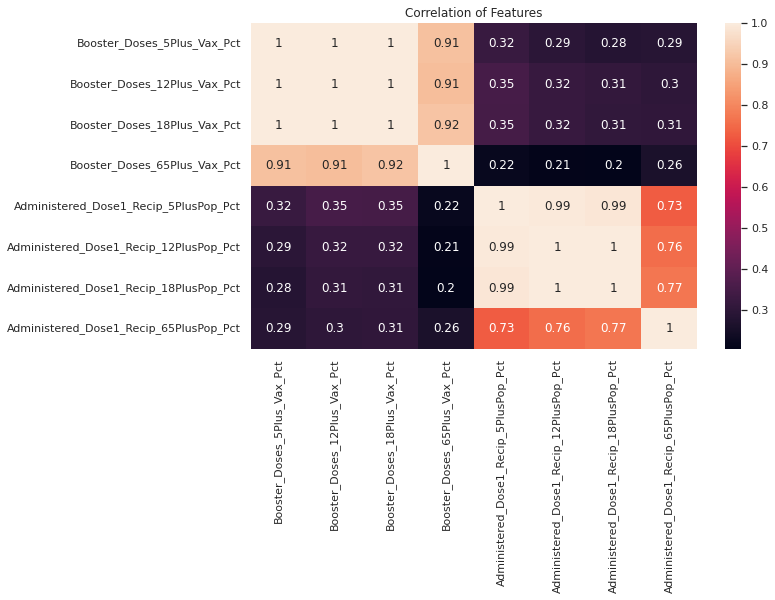

In [ ]:
#Correlation between Booster Dose Percentage and Administered Dose Percentage by age
heatmap_df = clean_data[["Booster_Doses_5Plus_Vax_Pct", "Booster_Doses_12Plus_Vax_Pct", "Booster_Doses_18Plus_Vax_Pct", "Booster_Doses_65Plus_Vax_Pct",
                   "Administered_Dose1_Recip_5PlusPop_Pct", "Administered_Dose1_Recip_12PlusPop_Pct", "Administered_Dose1_Recip_18PlusPop_Pct", "Administered_Dose1_Recip_65PlusPop_Pct"]]
plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(heatmap_df.corr(), annot=True)
dataplot.set_title('Correlation of Features')

plt.show()

In [ ]:
#Here is the data to be used for future implementations and analyses. We will expand on that.
clean_data.describe()

,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_5PlusPop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,...,Booster_Doses_Vax_Pct,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
count,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,...,40366.000000,40366.000000,40366.000000,40366.000000,40366.000000,4.036600e+04,4.036600e+04,4.036600e+04,4.036600e+04,4.036600e+04
mean,95.081963,63.776639,67.198137,71.273512,73.306565,89.224647,55.862615,59.158044,63.061245,64.967661,...,46.362756,46.410412,47.482428,48.959756,67.461230,1.701812e+05,1.600527e+05,1.453195e+05,1.323541e+05,2.775667e+04
std,4.777970,14.342413,14.422976,13.892796,13.320777,7.856308,12.379712,12.877037,12.755791,12.297607,...,10.501445,10.535758,11.052711,11.200822,12.945569,4.223386e+05,3.965300e+05,3.598194e+05,3.281653e+05,6.182093e+04
min,73.400000,25.300000,27.700000,30.400000,32.300000,47.500000,22.000000,23.400000,25.300000,26.900000,...,0.200000,0.200000,0.200000,0.200000,0.000000,2.001500e+04,1.825700e+04,1.599100e+04,1.373000e+04,1.907000e+03
25%,94.000000,53.100000,56.300000,60.700000,63.200000,85.200000,46.500000,49.400000,53.400000,55.600000,...,39.800000,39.800000,40.400000,42.000000,62.200000,3.224400e+04,3.030700e+04,2.760900e+04,2.521900e+04,6.272000e+03
50%,96.900000,61.800000,65.500000,70.200000,72.600000,93.500000,54.500000,57.800000,62.100000,64.200000,...,46.500000,46.600000,47.500000,49.000000,69.000000,5.512700e+04,5.207000e+04,4.757400e+04,4.336400e+04,1.030200e+04
75%,98.100000,73.100000,77.300000,81.600000,83.800000,95.000000,63.700000,67.400000,71.600000,73.300000,...,53.800000,53.800000,55.200000,56.900000,75.700000,1.377440e+05,1.291630e+05,1.175800e+05,1.068520e+05,2.355400e+04
max,98.900000,95.000000,95.000000,95.000000,95.000000,95.000000,90.300000,95.000000,95.000000,95.000000,...,74.600000,75.500000,77.100000,78.900000,95.000000,1.003911e+07,9.459251e+06,8.619513e+06,7.894557e+06,1.413753e+06


## Machine Learning Models

<font color="orange">
This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.
</font>

# ***First step is to decide which regression model to use. There are many options Regression model available. kNN Regression, Liner Regression, Gradient Boosting Regression and Random Forest Regression models are the models decided to be tested. At the end, the model which appears to suit the requirements of the project better will be chosen for further use.***

# ***Booster doses are to be predicted; therefore, they are eliminated from the dataset. Then, for training purposes, the data is splitted into 2 parts: 80% training data - 20% test data***

In [ ]:
from sklearn.model_selection import train_test_split

X = clean_data.drop(["Booster_Doses_Vax_Pct", "Booster_Doses_5Plus_Vax_Pct", "Booster_Doses_12Plus_Vax_Pct", "Booster_Doses_18Plus_Vax_Pct", "Booster_Doses_65Plus_Vax_Pct",
                    "Census2019", "Census2019_5PlusPop", "Census2019_12PlusPop", "Census2019_18PlusPop", "Census2019_65PlusPop"], axis=1)

y = clean_data[["Booster_Doses_Vax_Pct", "Booster_Doses_5Plus_Vax_Pct", "Booster_Doses_12Plus_Vax_Pct", "Booster_Doses_18Plus_Vax_Pct", "Booster_Doses_65Plus_Vax_Pct"]]

# 80% for training and 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.80, random_state=0)

NameError: ignored

# ***kNN appeared to be the most basic method to start. As hyperparameter number of neighbors is chosen and model is trained multiple times with different neighbor amounts. As a result we observed a significant decrease in accuracy of the model as number of neighbors increased.***

In [ ]:
#Try another method to for prediction
from sklearn.neighbors import KNeighborsRegressor

kNums = [3,5,7,9,90]
for k in kNums:
  model = KNeighborsRegressor(k, metric="euclidean")
  model.fit(X_train, y_train)
  print("For K : ", k)
  print("Validation score of KNeighborsRegressor with k={} is {}".format(k, model.score(X_val, y_val)) )
  print("Training score of KNeighborsRegressor with k={} is {}".format(k, model.score(X_train, y_train)) )
  print("-----------------------------")
  

For K :  3
Validation score of KNeighborsRegressor with k=3 is 0.9546393206122226
Training score of KNeighborsRegressor with k=3 is 0.9850154137852615
-----------------------------
For K :  5
Validation score of KNeighborsRegressor with k=5 is 0.9240648174244246
Training score of KNeighborsRegressor with k=5 is 0.9610457024964916
-----------------------------
For K :  7
Validation score of KNeighborsRegressor with k=7 is 0.891930299943237
Training score of KNeighborsRegressor with k=7 is 0.932143008200554
-----------------------------
For K :  9
Validation score of KNeighborsRegressor with k=9 is 0.8637404613569695
Training score of KNeighborsRegressor with k=9 is 0.9024696005203646
-----------------------------
For K :  90
Validation score of KNeighborsRegressor with k=90 is 0.6611337286290775
Training score of KNeighborsRegressor with k=90 is 0.6757787266354373
-----------------------------


# ***Then Linear regression model is tested but its base accuracy level was found too low to be considered in hyperparameter testing***

In [ ]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

linearModel.score(X_val, y_val)

0.6591356836423122

# ***Next model to be tested is Gradient Boosting Regressor. As a hyperparameter number of estimators is choosen, accucary score of the model reached as high as 0.92 with n_estimator=1024. Although model itself is relly accurate, it is only capable of predicting a single variable which is not suitable for our project as aim of the project is to predict the "Booster Dose Demand" in total and also for different age groups...***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

est = [3,9,15,30,90,180,360,720,1024]

for n in est:
  gradModel = GradientBoostingRegressor(n_estimators =n)
  gradModel.fit(X_train, y_train["Booster_Doses_Vax_Pct"])
  print("For N : ", n)
  print("Validation score of GradientBoostingRegressor with n={} is {}".format(n, gradModel.score(X_val, y_val["Booster_Doses_Vax_Pct"])) )
  print("Traininig score of GradientBoostingRegressor with n={} is {}".format(n, gradModel.score(X_train, y_train["Booster_Doses_Vax_Pct"])) )

For N :  3
Validation score of GradientBoostingRegressor with n=3 is 0.21400550595087697
Traininig score of GradientBoostingRegressor with n=3 is 0.2239754714676927
For N :  9
Validation score of GradientBoostingRegressor with n=9 is 0.43484056879626987
Traininig score of GradientBoostingRegressor with n=9 is 0.44999967520593387
For N :  15
Validation score of GradientBoostingRegressor with n=15 is 0.5396372893184795
Traininig score of GradientBoostingRegressor with n=15 is 0.5556181673877594
For N :  30
Validation score of GradientBoostingRegressor with n=30 is 0.6650422788432602
Traininig score of GradientBoostingRegressor with n=30 is 0.6813887154971149
For N :  90
Validation score of GradientBoostingRegressor with n=90 is 0.821174008698311
Traininig score of GradientBoostingRegressor with n=90 is 0.8417669886940412
For N :  180
Validation score of GradientBoostingRegressor with n=180 is 0.86586725173579
Traininig score of GradientBoostingRegressor with n=180 is 0.8912053629597803
F

# ***...and the error of the model is tested with respect to n_estimators=1024***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

params = {"n_estimators": 1024}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train["Booster_Doses_Vax_Pct"])

y_pred = reg.predict(X_val)

mse = mean_squared_error(y_val["Booster_Doses_Vax_Pct"], y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val["Booster_Doses_Vax_Pct"], y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

reg.score(X_val, y_val["Booster_Doses_Vax_Pct"])

mse: 7.998194626899549
rmse: 2.828107958848026
mae: 2.050050342351959


0.9271286822507563

# ***Last model to be tested is the Random Forest Regressor. As hyperparameter, number of trees in the model is chosen. As a result accuracy score of the model reached as high as 0.96. But as final a final parameter, 180 is chosen because after 180 increase in accuracy score was not significant but training time of the algorithm increased significantly...***

In [ ]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor
forNums = [3,5,7,9, 90,180,360]
for k in forNums:
  modelForest = RandomForestRegressor(k, random_state = 0)
  modelForest.fit(X_train, y_train)
  print("For K : ", k)
  print("Validation score of RandomForestRegressor with k={} is {}".format(k, modelForest.score(X_val, y_val)) )
  print("Traininig score of RandomForestRegressor with k={} is {}".format(k, modelForest.score(X_train, y_train)) )
  print("-----------------------------")


For K :  3
Validation score of RandomForestRegressor with k=3 is 0.9259166901108179
Traininig score of RandomForestRegressor with k=3 is 0.9807303598726371
-----------------------------
For K :  5
Validation score of RandomForestRegressor with k=5 is 0.9386255687364875
Traininig score of RandomForestRegressor with k=5 is 0.9861520091494322
-----------------------------
For K :  7
Validation score of RandomForestRegressor with k=7 is 0.9428750514209702
Traininig score of RandomForestRegressor with k=7 is 0.988129321696189
-----------------------------
For K :  9
Validation score of RandomForestRegressor with k=9 is 0.945964058993207
Traininig score of RandomForestRegressor with k=9 is 0.9897144771298084
-----------------------------
For K :  90
Validation score of RandomForestRegressor with k=90 is 0.9560841627534982
Traininig score of RandomForestRegressor with k=90 is 0.9940751053287018
-----------------------------
For K :  180
Validation score of RandomForestRegressor with k=180 is 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
modelForest = RandomForestRegressor(180, random_state = 0)
modelForest.fit(X_train, y_train)
print("For K : ", 180)
print("Validation score of RandomForestRegressor with k={} is {}".format(180, modelForest.score(X_val, y_val)) )
print("Traininig score of RandomForestRegressor with k={} is {}".format(180, modelForest.score(X_train, y_train)) )
print("-----------------------------")

For K :  180
Validation score of RandomForestRegressor with k=180 is 0.956164699061936
Traininig score of RandomForestRegressor with k=180 is 0.9942910598084623
-----------------------------


# ***...and the error of the model is tested with respect to n_estimators=180***

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = modelForest.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)

print("mse: {}".format(mse))
print("rmse: {}".format(rmse))
print("mae: {}".format(mae))

mse: 5.60055551817279
rmse: 2.3665492849659375
mae: 1.4078231049220777


### Results & Discussion

<font color="blue">
Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.
</font>

# ***Visual represntation of the model***

# ***This is the data entered to the model***

In [ ]:
X_train.head(1)

,Completeness_pct,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_5PlusPop_Pct,Series_Complete_12PlusPop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct
33578,98.3,61.4,65.1,69.5,72.1,89.4,56.2,59.7,63.9,66.3,83.2


# ***This is the data expected from the model***

In [ ]:
y_train.head(1)

,Booster_Doses_Vax_Pct,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct
33578,49.7,49.7,50.9,52.3,73.1


# ***This is the date returned from the model***

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns = y_train.columns)
y_pred_df.head(1)

,Booster_Doses_Vax_Pct,Booster_Doses_5Plus_Vax_Pct,Booster_Doses_12Plus_Vax_Pct,Booster_Doses_18Plus_Vax_Pct,Booster_Doses_65Plus_Vax_Pct
0,43.828333,43.946667,44.68,46.078889,68.315556


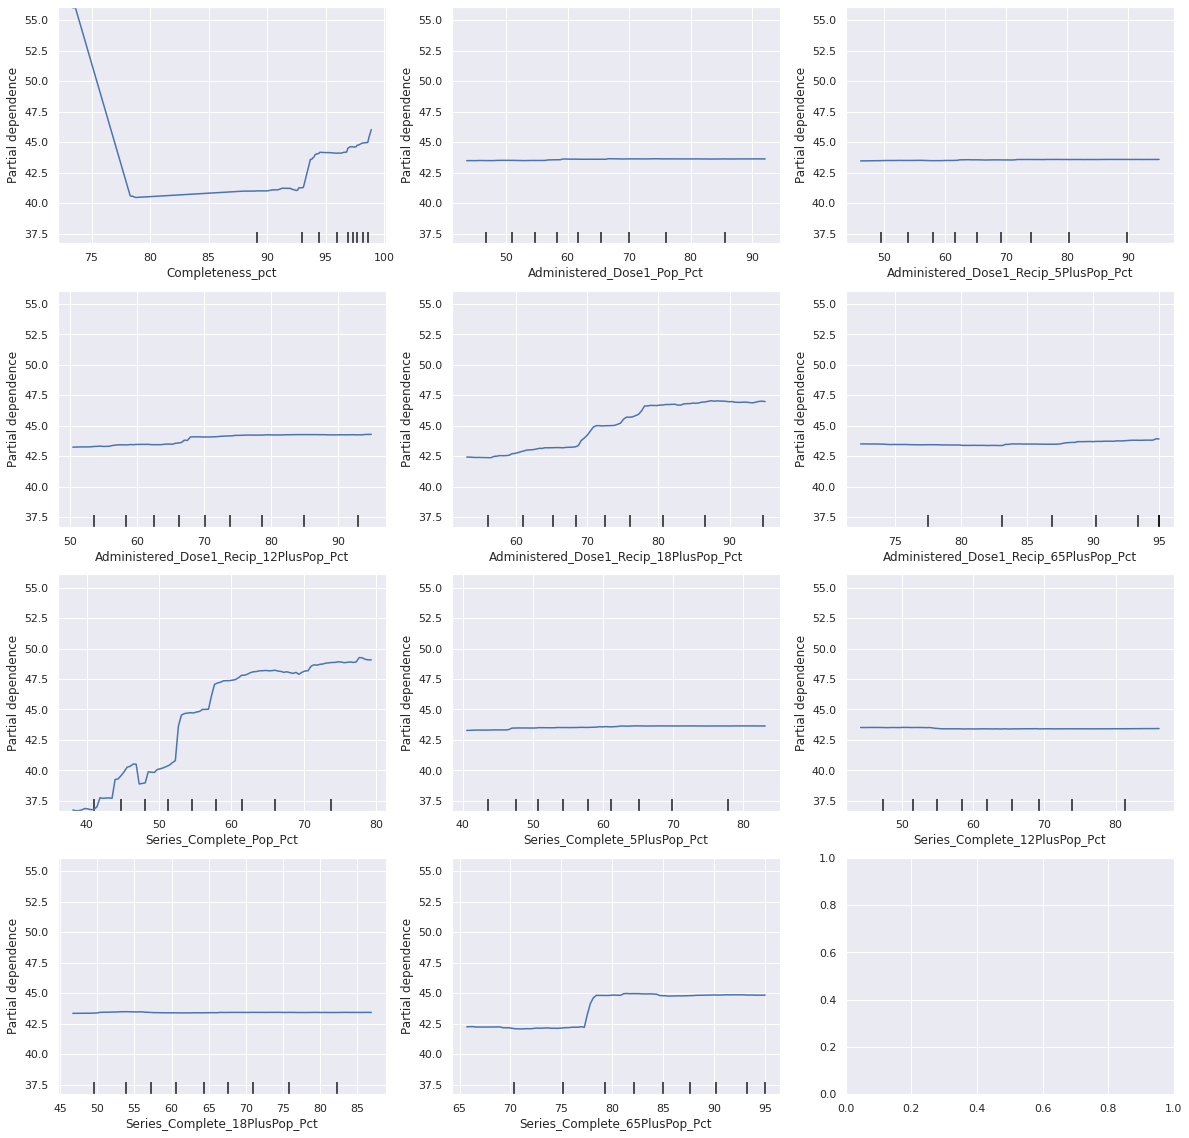

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig,axs = plt.subplots(4, 3, figsize=(20,20))

axes = [ axs[0][0],axs[0][1],axs[0][2],axs[1][0],axs[1][1],axs[1][2],axs[2][0],axs[2][1],axs[2][2],axs[3][0],axs[3][1] ]

modelForest = RandomForestRegressor(180, random_state = 42)
modelForest.fit(X_train, y_train)
disp1 = PartialDependenceDisplay.from_estimator(modelForest, X_train, X_train.columns, ax=axes)

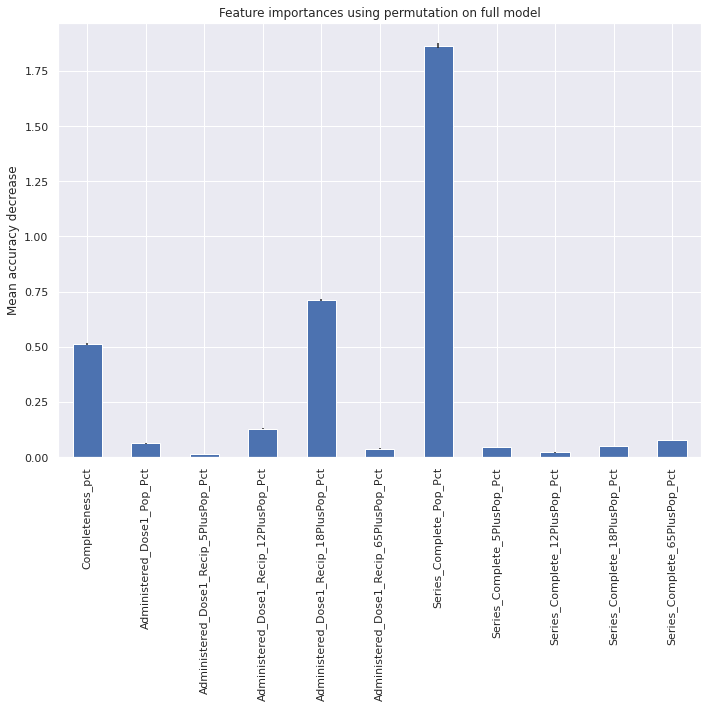

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    modelForest, X_val, y_val, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=X_val.columns)

fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Conclusion

<font color="orange">
Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?
</font>


# ***The project seems to be applicable to real life. Given a model, with this method, it is possible to predict the demand for Booster Doses. This prediction facilitates both production and transportation since it will provide a useful insight both for local authorities and global vaccine producers about the amount of booster-dose vaccine that will be demanded by local populations. However, the model is only capable of predicting the last (boosting) doses required for healthier individuals, which might not help much during the heat of a pandemic/epidemic.***

## Future Work

<font color="orange">
In the progress report, clearly state your goals for the final report.<br>
In the final report, articulate on the future directions, scenarios.
</font>

# ***1) Data should also be collected and tested on countries other than US.***
# ***2) Only Booster Dose demand is predicted within this model. Further research could reveal improved models for vaccination demand prediction in general, which will be much more useful in such a pandemic crisis.***
# ***3) The model could be improved with a more detailed/fragmented parameters. ***

## Work Division

<font color="orange">
A clear description of the division of work among teammates.
</font>

------------------------------------------------
# ***Problem Definition and Data Exploration: Kayra Berk Akşit, Eren Güngör, Emir Yiğit Akpınar, Ebrar Berenay Yiğit, Osman Cırık***
------------------------------------------------
# ***Machine Learning Model Development & Test: Kayra Berk Akşit, Eren Güngör, Emir Yiğit Akpınar, Osman Cırık***
------------------------------------------------
# ***Results&Conclusion: Kayra Berk Akşit, Eren Güngör***
------------------------------------------------
